# Feature Selection-Information gain - mutual information In Regression Problem Statements
Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [1]:
import pandas as pd
df=pd.read_csv('house price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
ndf=['int64']
numerical_cols=list(df.select_dtypes(include=ndf).columns)
numerical_cols

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [5]:
df=df[numerical_cols]
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
df=df.drop(labels='Id',axis=1)

In [10]:
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
x=df.drop(labels='SalePrice',axis=1)
y=df['SalePrice']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                               random_state=0)

In [13]:
x_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,9375,7,5,1997,1998,739,0,318,1057,...,645,576,36,0,0,0,0,0,2,2009
682,120,2887,6,5,1996,1997,1003,0,288,1291,...,431,307,0,0,0,0,0,0,11,2008
960,20,7207,5,7,1958,2008,696,0,162,858,...,0,117,0,0,0,0,0,0,2,2010
1384,50,9060,6,5,1939,1950,204,0,356,560,...,280,0,0,0,0,0,0,0,10,2009
1100,30,8400,2,5,1920,1950,290,0,0,290,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,9430,8,5,1999,1999,1163,0,89,1252,...,856,0,128,0,0,180,0,0,7,2009
835,20,9600,4,7,1950,1995,442,0,625,1067,...,436,290,0,0,0,0,0,0,2,2010
1216,90,8930,6,5,1978,1978,0,0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,3196,7,5,2003,2004,0,0,1374,1374,...,420,143,20,0,0,0,0,0,10,2006


In [14]:
x_train.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [15]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.06027851, 0.07852176, 0.47536734, 0.1078104 , 0.24746751,
       0.21873507, 0.13669556, 0.        , 0.10482048, 0.26892463,
       0.25674717, 0.13372304, 0.        , 0.35771128, 0.01869019,
       0.        , 0.25611111, 0.07031238, 0.0373087 , 0.00873119,
       0.15913088, 0.17532807, 0.37943134, 0.32984253, 0.07146014,
       0.04240794, 0.01683248, 0.00153031, 0.02409524, 0.        ,
       0.        , 0.        , 0.0310133 ])

In [16]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.475367
GarageCars       0.379431
GrLivArea        0.357711
GarageArea       0.329843
TotalBsmtSF      0.268925
1stFlrSF         0.256747
FullBath         0.256111
YearBuilt        0.247468
YearRemodAdd     0.218735
Fireplaces       0.175328
TotRmsAbvGrd     0.159131
BsmtFinSF1       0.136696
2ndFlrSF         0.133723
OverallCond      0.107810
BsmtUnfSF        0.104820
LotArea          0.078522
WoodDeckSF       0.071460
HalfBath         0.070312
MSSubClass       0.060279
OpenPorchSF      0.042408
BedroomAbvGr     0.037309
YrSold           0.031013
ScreenPorch      0.024095
BsmtFullBath     0.018690
EnclosedPorch    0.016832
KitchenAbvGr     0.008731
3SsnPorch        0.001530
BsmtHalfBath     0.000000
LowQualFinSF     0.000000
BsmtFinSF2       0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

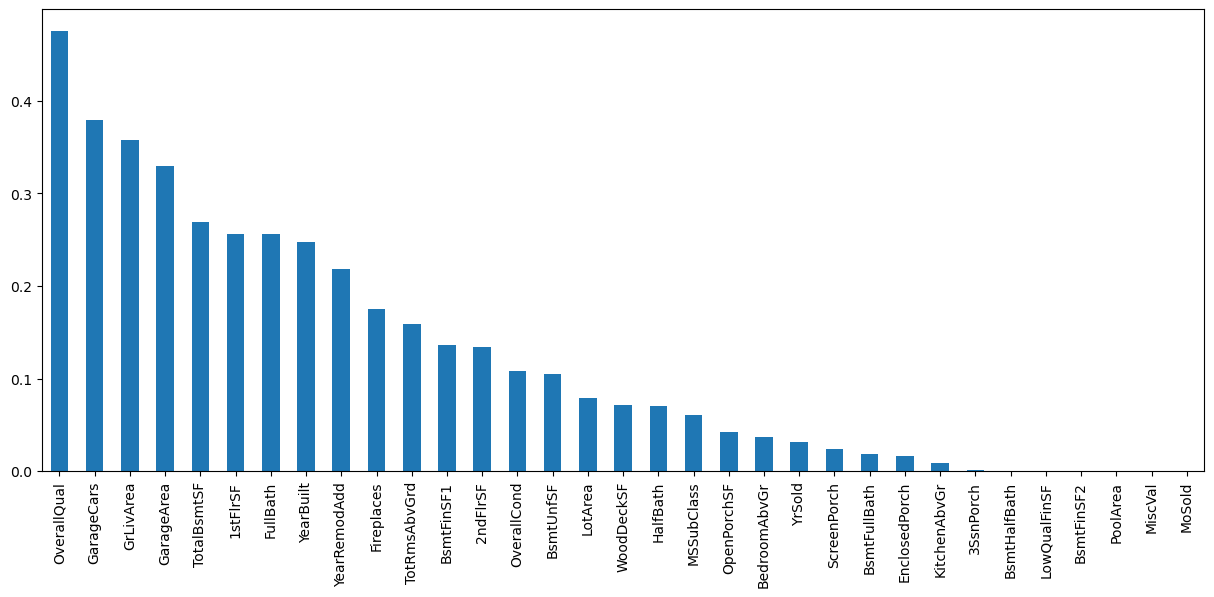

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,6))

In [20]:
from sklearn.feature_selection import SelectPercentile
select_top20=SelectPercentile(mutual_info_regression,percentile=20)
select_top20.fit(x_train,y_train)
x_train.columns[select_top20.get_support()]

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea'],
      dtype='object')